# Collaboration and Competition Project

## 1. Imports

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from ddpg_agent import Agent

## 2. Set up the environment and agent

In [2]:
#setup the environment
env = UnityEnvironment(file_name="Tennis_Windows_x86_64\Tennis.exe")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('The state for the second agent looks like:', states[1])
#set up agent 1 and 2
agent = Agent(state_size, action_size, random_seed=12)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
The state for the second agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.4669857  -1.5
  0.          0.         -6.83172083  6.          0.          0.        ]


## 3. Train both agents with the DDPG Algorithm

Episode 100	Average Score: 0.2178
Episode 200	Average Score: 0.2908
Episode 300	Average Score: 0.3389
Episode 400	Average Score: 0.3290
Episode 500	Average Score: 0.4469
Episode 510	Average Score: 0.5098
Environment solved in 510 episodes!	Average Score: 0.5098


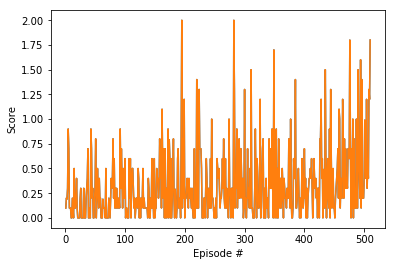

In [3]:
def ddpg(n_episodes=6000, max_t = 1000, print_every=100):
        """Makes the agent act according to DDPG"""
        #load checkpoints from previous training
        agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth', map_location = 'cpu'))
        agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth', map_location = 'cpu'))
        scores_deque = deque(maxlen=print_every)
        scores = []
        for i_episode in range(1, n_episodes+1):
            env_info = env.reset(train_mode=True)[brain_name]
            agent.reset()
            state = env_info.vector_observations
            score = np.zeros(num_agents)


            for t in range(max_t):

                action = agent.act(state)
                #env.step returns brainInfo object that contains next_state, reward and done 
                brainInfo = env.step(action)[brain_name]           
                next_state = brainInfo.vector_observations
                reward = brainInfo.rewards
                #true when episode done, otherwise false
                done = brainInfo.local_done
                #pass new observations from brain to agent
                agent.step(state, action, reward, next_state, done)
                state = next_state
                score += np.amax(reward)

                if np.any(done):
                    break

            scores_deque.append(score)
            scores.append(score)

            print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)), end="")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor1.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic1.pth')
            if i_episode % print_every == 0:
                print('\rEpisode {}\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
            if np.mean(scores_deque)>=0.5:
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.4f}'.format(i_episode, np.mean(scores_deque)))
                torch.save(agent.actor_local.state_dict(), 'checkpoint_actor_final.pth')
                torch.save(agent.critic_local.state_dict(), 'checkpoint_critic_final.pth')
                break
        return scores
    
    scores = ddpg()
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(1, len(scores)+1), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()
    

## 4. Test the trained Agent

In [3]:
#watch a smart agent
agent.actor_local.load_state_dict(torch.load('checkpoint_actor_final.pth', map_location = 'cpu'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic_final.pth', map_location = 'cpu'))

#test agent for one episode
env_info = env.reset(train_mode=False)[brain_name]
agent.reset()
state = env_info.vector_observations
score = np.zeros(num_agents)
for t in range(1000):

    action = agent.act(state)
    #env.step returns brainInfo object that contains next_state, reward and done 
    brainInfo = env.step(action)[brain_name]           
    next_state = brainInfo.vector_observations
    reward = brainInfo.rewards
    #true when episode done, otherwise false
    done = brainInfo.local_done
    #pass new observations from brain to agent
    agent.step(state, action, reward, next_state, done)
    state = next_state
    score += np.amax(reward)

    if np.any(done):
        break


print("Score: {}".format(score))

C:\Users\Chris\Anaconda3\lib\site-packages\torch\nn\functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Score: [1.00000001 1.00000001]


## 5. Close the environment

In [ ]:
env.close()